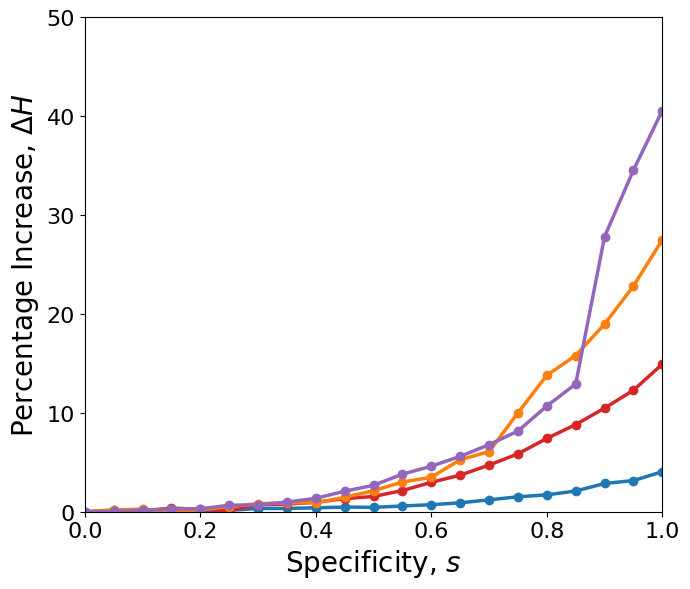

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("host_availability.csv") 

records = []
for n_val, dsub in df.groupby("n"):
    dsub = dsub.sort_values("s")                   # make sure s is 0…1
    baseline = dsub.loc[dsub["s"] == 0, "mean_H"].values[0]
    pct_change = 100 * (dsub["mean_H"] - baseline) / baseline

    records.append((n_val, dsub["s"].values, pct_change.values))

plt.figure(figsize=(7, 6))

colors  = ["tab:blue", "tab:red", "tab:orange", "tab:purple"]

for (n_val, s_vec, pct_vec), c in zip(records, colors):
    plt.plot(s_vec, pct_vec, marker="o", color=c, linewidth=2.5, markersize=6, label=fr"$n={n_val}$")

# axes, labels, ticks, legend
plt.xlabel(r"Specificity, $s$", fontsize=20)
plt.ylabel(r"Percentage Increase, $\Delta H$", fontsize=20)
plt.xticks(fontsize=16)  # increased x-tick font size
plt.yticks(fontsize=16)  # increased y-tick font size
plt.ylim(0, 50)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig("mean_host.png", dpi=600)
plt.show()